In [293]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree as sklearn_tree

from dtreeviz.models.sklearn_decision_trees import ShadowSKDTree
from dtreeviz import trees
from sklearn.model_selection import cross_val_score
from dtreeviz import clfviz
from sklearn.impute import SimpleImputer
import numpy as np
from pycaret.classification import *

import graphviz
from dtreeviz.trees import *
import matplotlib.pyplot as plt
import shap
from category_encoders.cat_boost import CatBoostEncoder

from sklearn.preprocessing import StandardScaler

In [188]:
my = pd.read_csv("my.csv")
ue_related = pd.read_csv("ue_related.csv")
notif_related = pd.read_csv("notif_related.csv")
device_related = pd.read_csv("device_related.csv")

In [189]:
my

,user_id,high_active_users_last_5min_at_10day,active_users_2day_at_lastweek,active_users_last_30_days,inactive_users_last_7_days,last_act_geo_sub_continent,last_act_geo_country,last_act_app_info_version,last_act_device_mobile_brand_name,last_act_privacy_info_ads_storage,...,distinct_notification_foreground_count,distinct_notification_dismiss_count,distinct_notification_open_count,distinct_notification_receive_count,campaign_count,notif_foreground_count,notif_dismiss_count,notif_open_count,notif_receive_count,distinct_mobile_brand_name
0,003188bb-893b-4612-bd76-8a1a165983fc,NaN,NaN,1.0,NaN,Western Asia,Turkey,2.2.05,Huawei,Yes,...,0,0,0,0,0,0,2,0,3,1
1,00ca3129-b784-454d-b85e-298c9117323f,NaN,NaN,1.0,NaN,Western Asia,Turkey,2.2.05,Xiaomi,Yes,...,0,0,0,0,0,0,3,0,3,1
2,01042f97-107c-4824-bcfd-06c619b54466,NaN,NaN,NaN,NaN,Western Asia,Turkey,2.2.02,Samsung,Yes,...,0,0,0,0,0,0,14,0,15,1
3,0127b6da-3f2c-4087-8a2c-ce10442fc3b9,NaN,NaN,NaN,NaN,Western Asia,Turkey,2.1.01,Samsung,NaN,...,0,0,0,0,0,0,9,0,9,1
4,012edd2d-e659-43af-8a3c-97e95a90d388,NaN,NaN,1.0,NaN,Western Asia,Turkey,2.2.05,Samsung,Yes,...,0,0,0,0,0,0,12,0,13,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46622,fea625b8-c95c-4c11-89d7-169977a4cdcf,NaN,NaN,NaN,NaN,Western Asia,Turkey,2.2.02,Samsung,Yes,...,0,0,0,0,0,0,10,0,25,1
46623,ff68f171-bb07-446e-9822-4ccebcef6b3a,NaN,NaN,1.0,NaN,Western Asia,Turkey,2.2.05,Samsung,Yes,...,0,0,0,0,0,0,0,0,9,1
46624,ff838d16-8a20-45ae-b003-8c61c178c330,NaN,NaN,1.0,NaN,Western Asia,Turkey,2.2.05,Xiaomi,Yes,...,0,0,0,0,0,0,0,0,0,1
46625,ff8c81de-4b03-4bf1-8dd5-1b7d33a45e60,NaN,NaN,1.0,NaN,Western Asia,Turkey,2.2.05,Samsung,Yes,...,0,0,0,0,0,0,3,0,3,1


In [190]:
ue_related

,user_id,event_date,elapsed_day_before_app_remove,app_remove_date,expanding_elapsed_day,first_day_engagement_msec_sum,first_week_engagement_msec_sum,first_two_week_engagement_msec_sum,first_month_engagement_msec_sum,first_week_active_distinct_day_cnt,...,last_day_engagement_msec_sum,last_week_engagement_msec_sum,last_two_week_engagement_msec_sum,last_month_engagement_msec_sum,last_week_active_distinct_day_cnt,last_two_week_active_distinct_day_cnt,last_month_active_distinct_day_cnt,daily_avg_session_duration_engagement_msec,expanding_window_sum,expanding_session_cnt_sum
0,0002dbf4-ae8d-4e1b-b60a-fd69c2976562,2021-07-23,19.0,2021-08-11,0,117544.0,118965.0,118965.0,118965.0,2,...,NaN,NaN,NaN,118965.0,0,0,2,117544.0,117544.0,1
1,0002dbf4-ae8d-4e1b-b60a-fd69c2976562,2021-07-27,15.0,2021-08-11,4,NaN,118965.0,118965.0,118965.0,2,...,NaN,NaN,NaN,118965.0,0,0,2,1421.0,118965.0,2
2,0002e33c-9dab-4266-8821-57eb52757d62,2021-08-30,NaN,NaN,0,285747.0,285747.0,285747.0,285747.0,1,...,285747.0,285747.0,285747.0,285747.0,1,1,1,285747.0,285747.0,1
3,0003aff5-7253-4357-8fba-2bb4c432b0a2,2021-08-25,NaN,NaN,0,36829.0,169623.0,169623.0,169623.0,2,...,169623.0,169623.0,169623.0,169623.0,2,2,2,36829.0,36829.0,1
4,0003aff5-7253-4357-8fba-2bb4c432b0a2,2021-08-26,NaN,NaN,1,NaN,169623.0,169623.0,169623.0,2,...,169623.0,169623.0,169623.0,169623.0,2,2,2,132794.0,169623.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158441,m2ZdtvMY28XTyysJbAd8ZqHBmKO2,2021-08-10,NaN,NaN,50,NaN,NaN,NaN,NaN,0,...,NaN,1443.0,1443.0,434527.0,1,1,2,1443.0,450282.0,4
158442,mECbkY0oRdTmPhyom2awqvQBhmo1,2021-07-02,NaN,NaN,0,574804.0,574804.0,574804.0,574804.0,1,...,NaN,NaN,NaN,NaN,0,0,0,143701.0,574804.0,4
158443,rb8mtw6xfZbn9vuTeH3kUrPciym1,2021-08-10,NaN,NaN,0,12386.0,12386.0,12386.0,12386.0,1,...,NaN,12386.0,12386.0,12386.0,1,1,1,12386.0,12386.0,1
158444,yAUwoxFDMCOgKiH6nAR7Zp2YH1p1,2021-07-02,NaN,NaN,7,NaN,NaN,9008.0,9008.0,0,...,NaN,NaN,NaN,NaN,0,0,0,7882.0,7882.0,1


In [191]:
notif_related

,user_id,event_date,in_app_message_impression_cnt,in_app_message_dismiss_ratio,in_app_message_action_ratio,notification_send_cnt,notification_receive_cnt,notification_receive_ratio,notification_open_ratio,notification_dimiss_ratio
0,02ed8869-9818-473a-944e-09aad39dd4d9,20210829,0,NaN,NaN,0,25,NaN,0.0400,0.9600
1,0383ac21-e944-4143-b0b6-3c39a871aa3c,20210829,0,NaN,NaN,0,25,NaN,0.0000,0.6800
2,0383ac21-e944-4143-b0b6-3c39a871aa3c,20210830,0,NaN,NaN,0,25,NaN,0.0000,0.6800
3,0451c1f5-3ffd-4620-a67a-fff91126946f,20210815,0,NaN,NaN,0,25,NaN,0.0800,0.8800
4,0451c1f5-3ffd-4620-a67a-fff91126946f,20210815,0,NaN,NaN,0,25,NaN,0.0800,0.9200
...,...,...,...,...,...,...,...,...,...,...
954350,fb84804f-a691-47b2-9d1e-6a4043e2690e,20210828,0,NaN,NaN,0,24,NaN,0.0000,0.9583
954351,fb84804f-a691-47b2-9d1e-6a4043e2690e,20210828,0,NaN,NaN,0,24,NaN,0.0000,1.0000
954352,fdee684e-d962-4049-9cf3-1c9ba41dba3f,20210828,0,NaN,NaN,0,24,NaN,0.0000,1.0000
954353,ff928628-436d-4735-987d-3f2422809071,20210814,0,NaN,NaN,0,24,NaN,0.0417,0.9167


In [192]:
device_related

,user_id,geo_country,geo_continent,device_platform,device_category,device_operating_system,device_operating_system_version,platform_distinct_cnt,device_category_distinct_cnt,device_op_system_distinct_cnt
0,94d4e03f-6a9e-40a0-9774-0c9eebaf7c74,turkey,asia,android,mobile,android,android 10,1,1,1
1,9a37cdf9-81e1-4cbc-99d5-e2421b0573c3,turkey,asia,android,mobile,android,android 10,1,1,1
2,354ace06-c39b-4aff-94f9-e4d558a01dc5,turkey,asia,android,mobile,android,android 10,1,1,1
3,e1b9a64d-ca99-42f2-94c9-5124e196cc0e,turkey,asia,android,mobile,android,android 10,1,1,1
4,ac56b4c0-847d-49f3-8d44-6be25fa59b8e,turkey,asia,android,mobile,android,android 10,1,1,1
...,...,...,...,...,...,...,...,...,...,...
46621,116d41f5-8581-420c-b780-2f25776e98ba,turkey,asia,android,mobile,android,android 10,1,1,1
46622,d18660c0-ce54-4983-9595-b985c9eb8754,turkey,asia,android,mobile,android,android 11,1,1,1
46623,8c92b782-4750-49c7-9aac-539558d61b1f,turkey,asia,android,mobile,android,android 10,1,1,1
46624,2c658916-bc32-45dc-911f-8221dda3a291,turkey,asia,android,mobile,android,android 10,1,1,1


In [193]:
my_df = my.drop(['user_id','active_users_last_30_days'], axis=1)

In [194]:
my_df.dropna(how='all', axis=1, inplace=True)

In [195]:
my_df.app_remove.value_counts()

0     35679
1     10646
2       243
3        32
4        16
5         5
6         3
7         1
8         1
11        1
Name: app_remove, dtype: int64

In [196]:
my_df.loc[my_df.app_remove > 1, 'app_remove'] = 1

In [197]:
my_df.app_remove.value_counts()

0    35679
1    10948
Name: app_remove, dtype: int64

In [198]:
numerica_fe = my_df.drop('app_remove', axis=1).select_dtypes(include = np.number).columns.tolist()
categorical_fe = list(set(my_df.drop('app_remove', axis=1).columns) - set(numerica_fe))
categorical_fe

['last_act_app_info_version',
 'last_act_device_mobile_brand_name',
 'last_act_geo_sub_continent',
 'last_act_privacy_info_ads_storage',
 'last_act_geo_country']

In [199]:
X = my_df.drop('app_remove', axis=1)
y= my_df.app_remove

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

CBE_encoder = CatBoostEncoder()
X_train = CBE_encoder.fit_transform(X_train, y_train)
X_test = CBE_encoder.transform(X_test)

In [200]:
X_train[categorical_fe][X_train[categorical_fe].isna()] = "Missing"
X_test[categorical_fe][X_test[categorical_fe].isna()] = "Missing"

In [201]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline

In [202]:
imputer = Pipeline([("imputer", SimpleImputer()),
                    ("pandarizer",FunctionTransformer(lambda x: pd.DataFrame(x, columns = X_train.columns)))])

X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [204]:
X_test

,last_act_geo_sub_continent,last_act_geo_country,last_act_app_info_version,last_act_device_mobile_brand_name,last_act_privacy_info_ads_storage,discrete_event_days,events_per_day,distinct_event_types,event_count,usage_range_timestamp,...,distinct_notification_foreground_count,distinct_notification_dismiss_count,distinct_notification_open_count,distinct_notification_receive_count,campaign_count,notif_foreground_count,notif_dismiss_count,notif_open_count,notif_receive_count,distinct_mobile_brand_name
0,0.239028,0.237971,0.155720,0.210921,0.193263,5.0,4.400000,10.0,22.0,4.933368e+11,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,3.0,1.0
1,0.239028,0.237971,0.155720,0.210921,0.193263,26.0,5.384615,11.0,140.0,5.232970e+13,...,0.0,0.0,0.0,0.0,0.0,0.0,25.0,0.0,25.0,1.0
2,0.239028,0.237971,0.251587,0.251666,0.193263,12.0,2.416667,7.0,29.0,5.112330e+12,...,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,11.0,1.0
3,0.239028,0.237971,0.436588,0.218243,0.521701,1.0,9.000000,5.0,9.0,2.021530e+08,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.239028,0.237971,0.155720,0.210921,0.193263,22.0,5.090909,14.0,112.0,8.270352e+12,...,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,19.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15382,0.239028,0.237971,0.155720,0.251666,0.193263,45.0,30.777778,17.0,1385.0,6.342055e+13,...,0.0,0.0,0.0,0.0,0.0,0.0,20.0,4.0,25.0,1.0
15383,0.239028,0.411182,0.436588,0.210921,0.521701,23.0,3.521739,10.0,81.0,6.654997e+12,...,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,22.0,1.0
15384,0.239028,0.237971,0.155720,0.210921,0.193263,29.0,2.724138,11.0,79.0,5.229105e+13,...,0.0,0.0,0.0,0.0,0.0,0.0,26.0,1.0,27.0,1.0
15385,0.239028,0.237971,0.155720,0.218243,0.193263,11.0,21.272727,11.0,234.0,4.784043e+13,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [207]:
X_train

,last_act_geo_sub_continent,last_act_geo_country,last_act_app_info_version,last_act_device_mobile_brand_name,last_act_privacy_info_ads_storage,discrete_event_days,events_per_day,distinct_event_types,event_count,usage_range_timestamp,...,distinct_notification_foreground_count,distinct_notification_dismiss_count,distinct_notification_open_count,distinct_notification_receive_count,campaign_count,notif_foreground_count,notif_dismiss_count,notif_open_count,notif_receive_count,distinct_mobile_brand_name
0,0.236492,0.236492,0.236492,0.236492,0.236492,24.0,8.833333,14.0,212.0,5.822304e+13,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,23.0,24.0,1.0
1,0.118246,0.118246,0.236492,0.236492,0.118246,8.0,4.375000,11.0,35.0,5.657737e+13,...,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,6.0,1.0
2,0.412164,0.412164,0.236492,0.236492,0.236492,16.0,3.125000,10.0,50.0,6.173467e+13,...,0.0,0.0,0.0,0.0,0.0,0.0,16.0,0.0,15.0,1.0
3,0.309123,0.309123,0.236492,0.118246,0.118246,15.0,3.933333,11.0,59.0,3.240649e+13,...,0.0,0.0,0.0,0.0,0.0,0.0,11.0,1.0,13.0,1.0
4,0.447298,0.447298,0.618246,0.118246,0.412164,25.0,4.280000,11.0,107.0,1.036301e+13,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31235,0.239035,0.237977,0.251560,0.210992,0.193262,29.0,7.172414,13.0,208.0,4.149981e+13,...,0.0,0.0,0.0,0.0,0.0,0.0,19.0,1.0,21.0,1.0
31236,0.239027,0.237969,0.155738,0.210968,0.193255,5.0,8.400000,10.0,42.0,4.229750e+13,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,3.0,1.0
31237,0.239019,0.237962,0.251532,0.251625,0.193248,3.0,30.000000,11.0,90.0,4.745493e+11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
31238,0.239044,0.237987,0.251616,0.210945,0.193278,26.0,5.230769,9.0,136.0,2.506036e+13,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,1.0


In [208]:
clf1 = setup(data = my_df, 
             target = 'app_remove',
             categorical_features = categorical_fe,
             silent = True)

,Description,Value
0,session_id,7543
1,Target,app_remove
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(46627, 31)"
5,Missing Values,True
6,Numeric Features,12
7,Categorical Features,18
8,Ordinal Features,False
9,High Cardinality Features,False


In [209]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9000,0.9401,0.7173,0.8300,0.7694,0.7060,0.7092,0.4800
gbc,Gradient Boosting Classifier,0.8921,0.9302,0.6743,0.8302,0.7440,0.6766,0.6826,5.7590
rf,Random Forest Classifier,0.8909,0.9268,0.6628,0.8347,0.7387,0.6709,0.6782,2.1580
et,Extra Trees Classifier,0.8858,0.9193,0.6562,0.8171,0.7277,0.6565,0.6630,3.0460
ada,Ada Boost Classifier,0.8823,0.9223,0.6589,0.8002,0.7226,0.6489,0.6539,1.4110
lda,Linear Discriminant Analysis,0.8510,0.8937,0.5444,0.7470,0.6297,0.5393,0.5500,1.3100
ridge,Ridge Classifier,0.8460,0.0000,0.4611,0.7900,0.5821,0.4957,0.5228,0.1300
dt,Decision Tree Classifier,0.8408,0.7818,0.6713,0.6542,0.6625,0.5584,0.5586,0.3090
knn,K Neighbors Classifier,0.8286,0.8186,0.5482,0.6582,0.5981,0.4903,0.4937,0.9260
lr,Logistic Regression,0.7672,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.8040


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=7543, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [262]:
dt_clf_sk = DecisionTreeClassifier(max_depth = 5)
dt_clf_sk.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [263]:
for importance, name in sorted(zip(dt_clf_sk.feature_importances_, X.columns),reverse=True)[:]:
    print (name, importance)

usage_range_timestamp 0.6758741584241951
last_act_app_info_version 0.12358893245861284
distinct_event_types 0.0775894541130609
event_traffic_freq 0.06176221356174734
notif_receive_count 0.05825577510084752
discrete_event_days 0.002225579439039828
last_act_geo_country 0.000703886902496531
user_engagement_millisec 0.0
session_start_count 0.0
screen_engagement_time_msec 0.0
os_update_count 0.0
notif_open_count 0.0
notif_foreground_count 0.0
notif_dismiss_count 0.0
last_act_privacy_info_ads_storage 0.0
last_act_geo_sub_continent 0.0
last_act_device_mobile_brand_name 0.0
events_per_day 0.0
event_count 0.0
distinct_notification_receive_count 0.0
distinct_notification_open_count 0.0
distinct_notification_foreground_count 0.0
distinct_notification_dismiss_count 0.0
distinct_mobile_brand_name 0.0
distinct_fatal_count 0.0
distinct_campaign_count 0.0
crash_engagement_time_msec 0.0
campaign_count 0.0
app_update_count 0.0
app_clear_count 0.0


In [264]:
X_train_dropf = X_train[['usage_range_timestamp','last_act_app_info_version','distinct_event_types',
                          'event_traffic_freq','notif_receive_count','discrete_event_days','last_act_geo_country']]
X_test_dropf = X_test[['usage_range_timestamp','last_act_app_info_version','distinct_event_types',
                          'event_traffic_freq','notif_receive_count','discrete_event_days','last_act_geo_country']]

In [ ]:
dt_clf_sk.fit(X_train, y_train)

In [279]:
scores = cross_val_score(dt_clf_sk, X_train, y_train, cv=10, n_jobs=-1, scoring="f1_macro")
scores

array([0.8081515 , 0.79925595, 0.82171359, 0.82050694, 0.81398401,
       0.82281507, 0.81438209, 0.82940062, 0.82034268, 0.82286219])

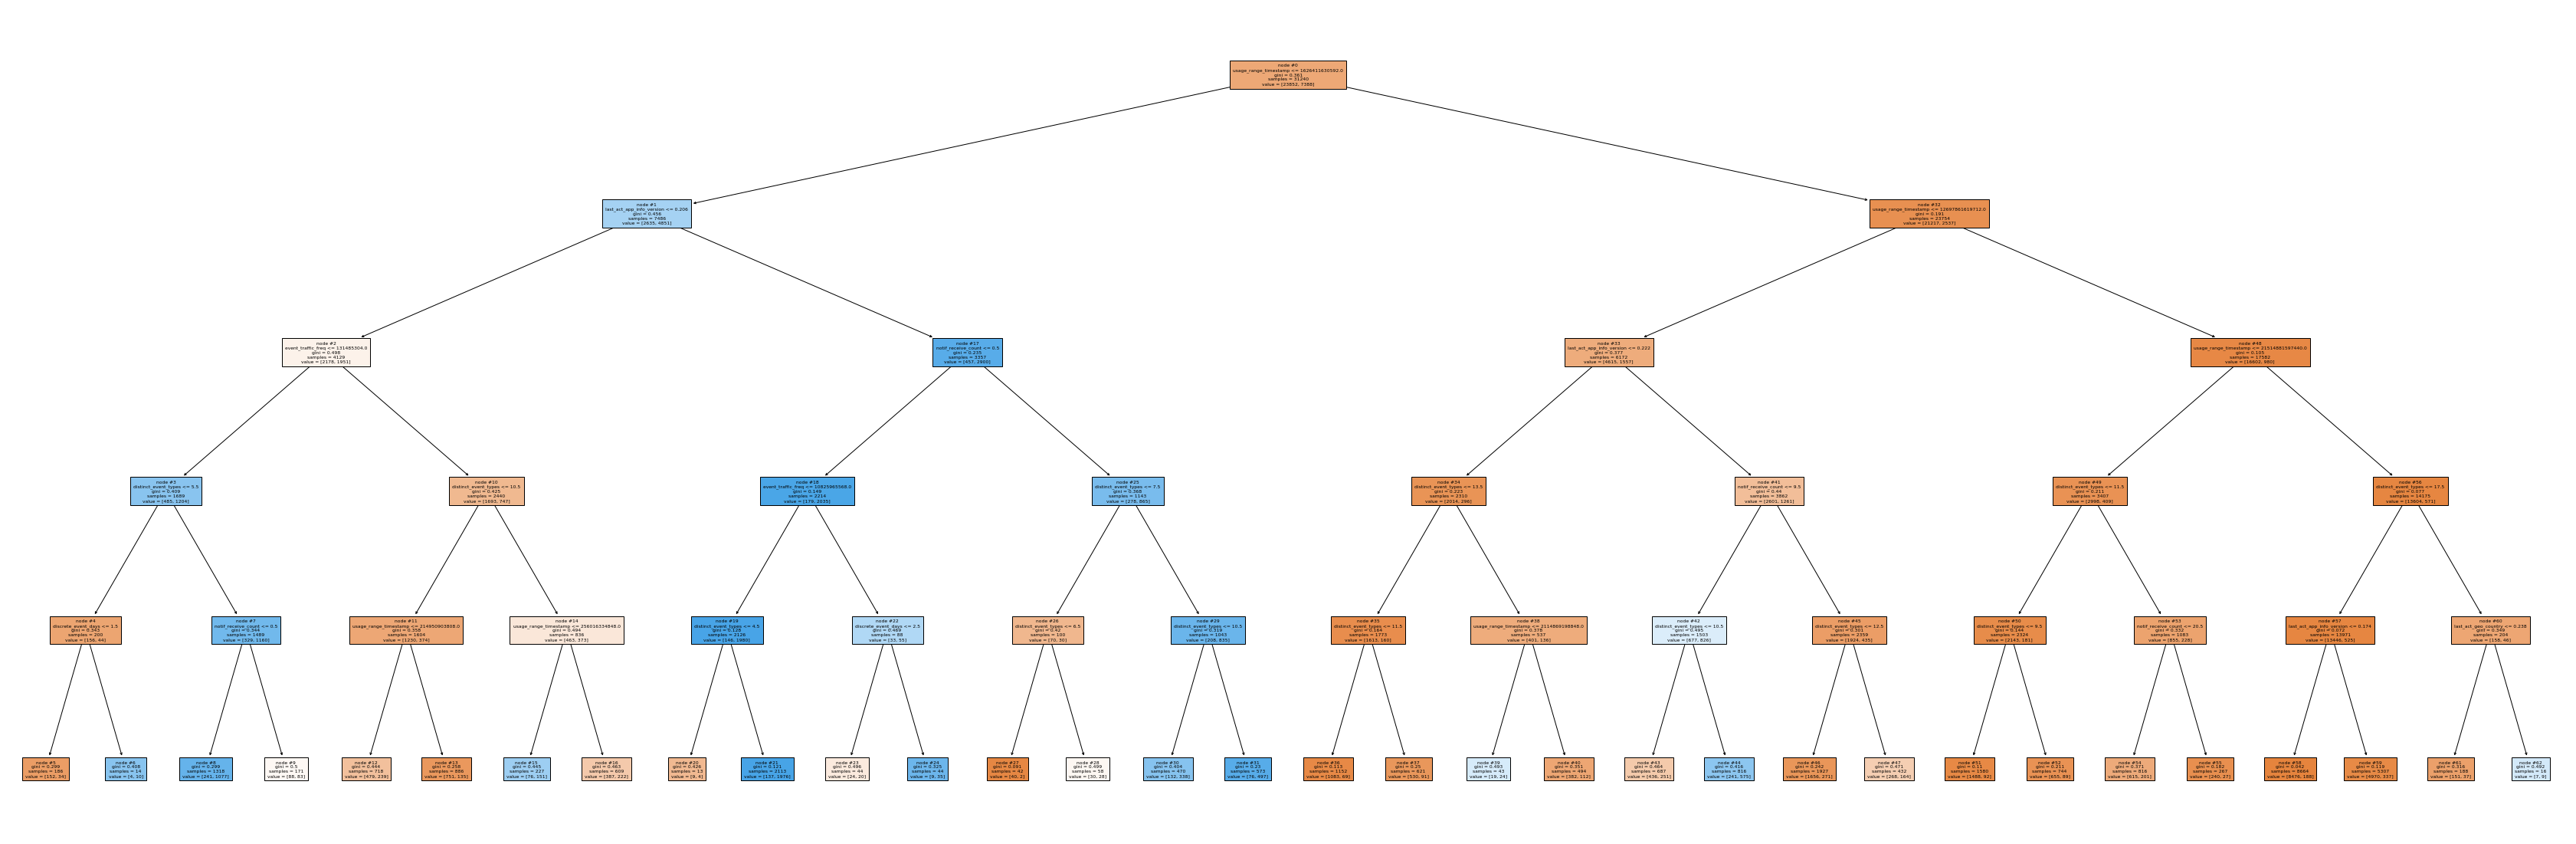

In [301]:
fig = plt.figure(figsize=(60,20))
treev = sklearn_tree.plot_tree(dt_clf_sk, feature_names = X.columns, fontsize=6, filled=True, node_ids=True)
plt.savefig('tree_high_dpi', dpi=100)

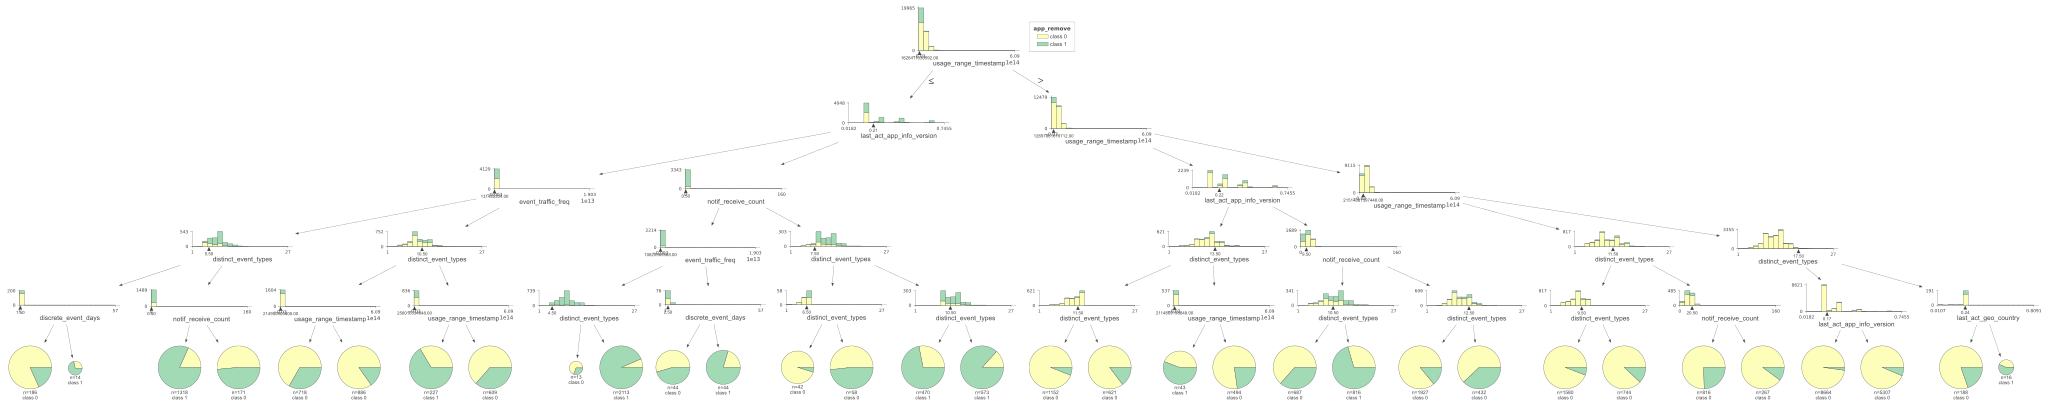

In [280]:
viz = dtreeviz(dt_clf_sk, 
               X_train,
               y_train,
               target_name='app_remove',
               feature_names=X_train.columns, 
               histtype= 'barstacked')  # barstackes is default
viz

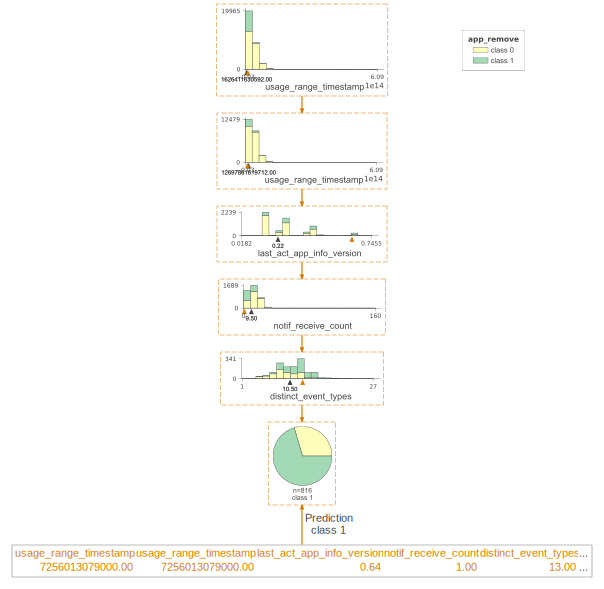

In [282]:
viz = dtreeviz(dt_clf_sk,
               X_train,
               y_train,
               target_name='app_remove',
               feature_names=X_train.columns,
               X=X_test.iloc[1998],
              show_just_path=True)  # pass the test observation
viz

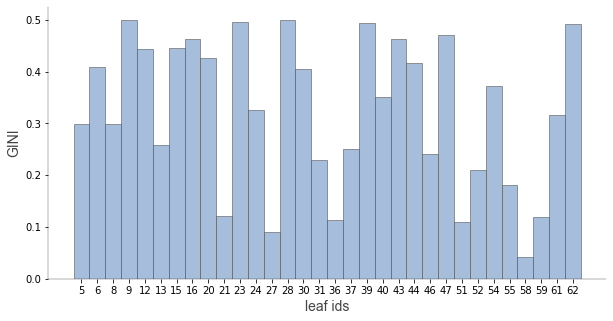

In [310]:
viz_leaf_criterion(dt_clf_sk, display_type = "plot")

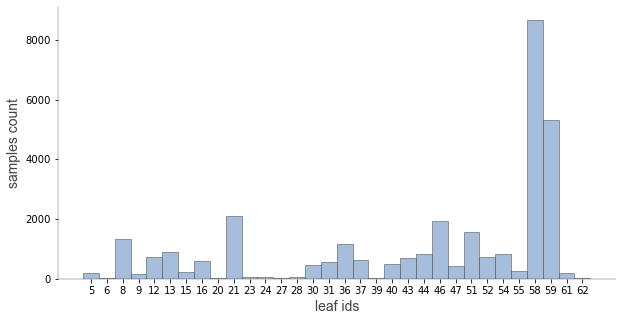

In [288]:
viz_leaf_samples(dt_clf_sk, X_train, display_type='plot')

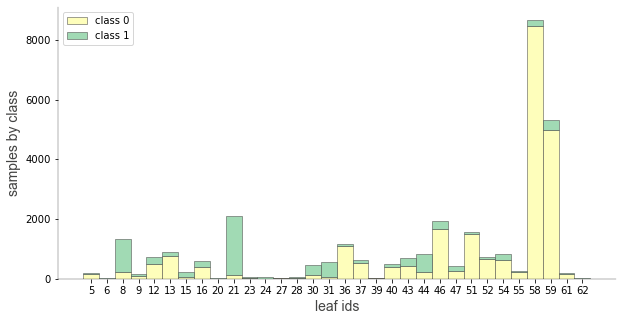

In [289]:
ctreeviz_leaf_samples(dt_clf_sk, X_train, y_train)

In [296]:
X_train_2f = X_train[['usage_range_timestamp', 'last_act_app_info_version']]
dt_clf_sk_2f = DecisionTreeClassifier(max_depth = 5)
dt_clf_sk_2f.fit(X_train_2f, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [298]:
X_train_2f

,usage_range_timestamp,last_act_app_info_version
0,5.822304e+13,0.236492
1,5.657737e+13,0.236492
2,6.173467e+13,0.236492
3,3.240649e+13,0.236492
4,1.036301e+13,0.618246
...,...,...
31235,4.149981e+13,0.251560
31236,4.229750e+13,0.155738
31237,4.745493e+11,0.251532
31238,2.506036e+13,0.251616


In [303]:
X_train_1f = X_train[['usage_range_timestamp']]
dt_clf_sk_1f = DecisionTreeClassifier(max_depth = 5)
dt_clf_sk_1f.fit(X_train_1f, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

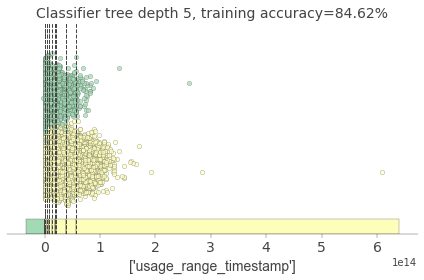

In [305]:
ct = ctreeviz_univar(dt_clf_sk_1f, X_train_1f, y_train,
                     feature_names = ['usage_range_timestamp'],
                     target_name='app_remove',
                     nbins=40, gtype='strip',
                     show={'splits','title'})
plt.tight_layout()
plt.show()

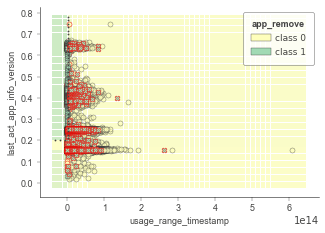

In [300]:
clfviz(dt_clf_sk_2f, X_train_2f, y_train, feature_names=['usage_range_timestamp', 'last_act_app_info_version'], markers=['o','X','s','D'], target_name='app_remove')

In [267]:
explainer_shap = shap.TreeExplainer(dt_clf_sk)

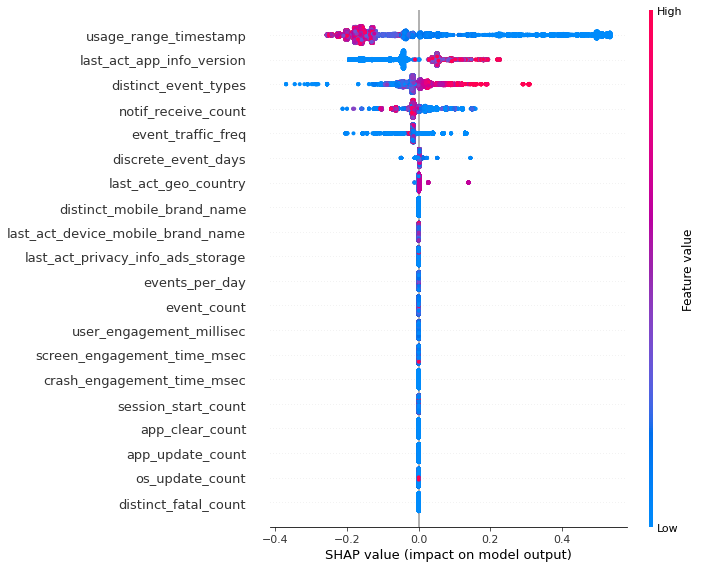

In [268]:
shap_values = explainer_shap.shap_values(X_test)
shap.summary_plot(shap_values[1],X_test)
#encoding yöntemi dolayısıyla high-low bazında featureları okumak zorlaşıyor

In [ ]:
----

In [9]:
ue_related 

,user_id,event_date,elapsed_day_before_app_remove,app_remove_date,expanding_elapsed_day,first_day_engagement_msec_sum,first_week_engagement_msec_sum,first_two_week_engagement_msec_sum,first_month_engagement_msec_sum,first_week_active_distinct_day_cnt,...,last_day_engagement_msec_sum,last_week_engagement_msec_sum,last_two_week_engagement_msec_sum,last_month_engagement_msec_sum,last_week_active_distinct_day_cnt,last_two_week_active_distinct_day_cnt,last_month_active_distinct_day_cnt,daily_avg_session_duration_engagement_msec,expanding_window_sum,expanding_session_cnt_sum
0,0002dbf4-ae8d-4e1b-b60a-fd69c2976562,2021-07-23,19.0,2021-08-11,0,117544.0,118965.0,118965.0,118965.0,2,...,NaN,NaN,NaN,118965.0,0,0,2,117544.0,117544.0,1
1,0002dbf4-ae8d-4e1b-b60a-fd69c2976562,2021-07-27,15.0,2021-08-11,4,NaN,118965.0,118965.0,118965.0,2,...,NaN,NaN,NaN,118965.0,0,0,2,1421.0,118965.0,2
2,0002e33c-9dab-4266-8821-57eb52757d62,2021-08-30,NaN,NaN,0,285747.0,285747.0,285747.0,285747.0,1,...,285747.0,285747.0,285747.0,285747.0,1,1,1,285747.0,285747.0,1
3,0003aff5-7253-4357-8fba-2bb4c432b0a2,2021-08-25,NaN,NaN,0,36829.0,169623.0,169623.0,169623.0,2,...,169623.0,169623.0,169623.0,169623.0,2,2,2,36829.0,36829.0,1
4,0003aff5-7253-4357-8fba-2bb4c432b0a2,2021-08-26,NaN,NaN,1,NaN,169623.0,169623.0,169623.0,2,...,169623.0,169623.0,169623.0,169623.0,2,2,2,132794.0,169623.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158441,m2ZdtvMY28XTyysJbAd8ZqHBmKO2,2021-08-10,NaN,NaN,50,NaN,NaN,NaN,NaN,0,...,NaN,1443.0,1443.0,434527.0,1,1,2,1443.0,450282.0,4
158442,mECbkY0oRdTmPhyom2awqvQBhmo1,2021-07-02,NaN,NaN,0,574804.0,574804.0,574804.0,574804.0,1,...,NaN,NaN,NaN,NaN,0,0,0,143701.0,574804.0,4
158443,rb8mtw6xfZbn9vuTeH3kUrPciym1,2021-08-10,NaN,NaN,0,12386.0,12386.0,12386.0,12386.0,1,...,NaN,12386.0,12386.0,12386.0,1,1,1,12386.0,12386.0,1
158444,yAUwoxFDMCOgKiH6nAR7Zp2YH1p1,2021-07-02,NaN,NaN,7,NaN,NaN,9008.0,9008.0,0,...,NaN,NaN,NaN,NaN,0,0,0,7882.0,7882.0,1


In [10]:
ue_related.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158446 entries, 0 to 158445
Data columns (total 22 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   user_id                                     158446 non-null  object 
 1   event_date                                  158446 non-null  object 
 2   elapsed_day_before_app_remove               21915 non-null   float64
 3   app_remove_date                             21915 non-null   object 
 4   expanding_elapsed_day                       158446 non-null  int64  
 5   first_day_engagement_msec_sum               45023 non-null   float64
 6   first_week_engagement_msec_sum              77219 non-null   float64
 7   first_two_week_engagement_msec_sum          138505 non-null  float64
 8   first_month_engagement_msec_sum             130570 non-null  float64
 9   first_week_active_distinct_day_cnt          158446 non-null  int64  
 

In [11]:
ue_related.loc[ue_related.app_remove_date.isna(),'app_remove_date'] = 0
ue_related.loc[ue_related.app_remove_date != 0,'app_remove_date'] = 1
ue_related.app_remove_date.value_counts()

0    136531
1     21915
Name: app_remove_date, dtype: int64

In [12]:
numerica_fe = ue_related.select_dtypes(include = np.number).columns.tolist()
categorical_fe = list(set(ue_related.drop('app_remove_date', axis=1).columns) - set(numerica_fe))
categorical_fe

['user_id', 'event_date']

In [16]:
ue_related.user_id.nunique()

46185

In [17]:
ue_related_dropped = ue_related.drop(['user_id','event_date'], axis=1)
ue_related_dropped

,elapsed_day_before_app_remove,app_remove_date,expanding_elapsed_day,first_day_engagement_msec_sum,first_week_engagement_msec_sum,first_two_week_engagement_msec_sum,first_month_engagement_msec_sum,first_week_active_distinct_day_cnt,first_two_week_active_distinct_day_cnt,first_month_active_distinct_day_cnt,last_day_engagement_msec_sum,last_week_engagement_msec_sum,last_two_week_engagement_msec_sum,last_month_engagement_msec_sum,last_week_active_distinct_day_cnt,last_two_week_active_distinct_day_cnt,last_month_active_distinct_day_cnt,daily_avg_session_duration_engagement_msec,expanding_window_sum,expanding_session_cnt_sum
0,19.0,1,0,117544.0,118965.0,118965.0,118965.0,2,2,2,NaN,NaN,NaN,118965.0,0,0,2,117544.0,117544.0,1
1,15.0,1,4,NaN,118965.0,118965.0,118965.0,2,2,2,NaN,NaN,NaN,118965.0,0,0,2,1421.0,118965.0,2
2,NaN,0,0,285747.0,285747.0,285747.0,285747.0,1,1,1,285747.0,285747.0,285747.0,285747.0,1,1,1,285747.0,285747.0,1
3,NaN,0,0,36829.0,169623.0,169623.0,169623.0,2,2,2,169623.0,169623.0,169623.0,169623.0,2,2,2,36829.0,36829.0,1
4,NaN,0,1,NaN,169623.0,169623.0,169623.0,2,2,2,169623.0,169623.0,169623.0,169623.0,2,2,2,132794.0,169623.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158441,NaN,0,50,NaN,NaN,NaN,NaN,0,0,0,NaN,1443.0,1443.0,434527.0,1,1,2,1443.0,450282.0,4
158442,NaN,0,0,574804.0,574804.0,574804.0,574804.0,1,1,1,NaN,NaN,NaN,NaN,0,0,0,143701.0,574804.0,4
158443,NaN,0,0,12386.0,12386.0,12386.0,12386.0,1,1,1,NaN,12386.0,12386.0,12386.0,1,1,1,12386.0,12386.0,1
158444,NaN,0,7,NaN,NaN,9008.0,9008.0,0,2,2,NaN,NaN,NaN,NaN,0,0,0,7882.0,7882.0,1


In [20]:
clf1 = setup(data = ue_related_dropped, 
             target = 'app_remove_date',
             silent = True)

,Description,Value
0,session_id,5315
1,Target,app_remove_date
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(158446, 20)"
5,Missing Values,True
6,Numeric Features,17
7,Categorical Features,2
8,Ordinal Features,False
9,High Cardinality Features,False


In [21]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0470
rf,Random Forest Classifier,1.0000,1.0000,0.9999,1.0000,1.0000,1.0000,1.0000,1.4310
ada,Ada Boost Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.8350
gbc,Gradient Boosting Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,3.4270
lightgbm,Light Gradient Boosting Machine,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.2030
et,Extra Trees Classifier,0.9895,0.9996,0.9256,0.9990,0.9609,0.9548,0.9558,1.7130
ridge,Ridge Classifier,0.8610,0.0000,0.0000,0.0000,0.0000,-0.0001,-0.0009,0.0330
lda,Linear Discriminant Analysis,0.8610,0.7065,0.0000,0.0000,0.0000,-0.0001,-0.0015,0.1830
lr,Logistic Regression,0.8602,0.6257,0.0005,0.0782,0.0010,-0.0008,-0.0053,0.3720
knn,K Neighbors Classifier,0.8511,0.7505,0.2488,0.4376,0.3171,0.2406,0.2528,0.5860


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=5315, splitter='best')